In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import platform
import seaborn as sns

# 운영 체제 확인
if platform.system() == 'Darwin':  # Mac
    print('apple gothic')
    font_name = 'AppleGothic'
elif platform.system() == 'Windows':  # Windows
    font_name = 'NanumGothic'
else:
    font_name = None

# 한글 폰트 설정
if font_name:
    plt.rcParams['font.family'] = font_name

# 마이너스 부호 설정
plt.rcParams['axes.unicode_minus'] = False

# Future Warning 메시지 제거
import warnings
warnings.simplefilter(action = 'ignore', category = FutureWarning)

apple gothic


In [36]:
df = pd.read_csv('../data/mpg.csv')
df

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
...,...,...,...,...,...,...,...,...,...,...,...
229,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize
230,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize
231,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize
232,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize


Text(0, 0.5, '값')

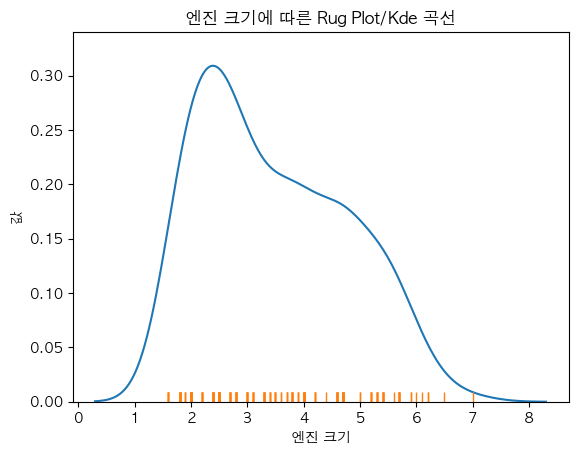

In [37]:
plt.subplot()
sns.kdeplot(data = df, x = 'displ')
ax = sns.rugplot(data = df, x = 'displ')
ax.set_title('엔진 크기에 따른 Rug Plot/Kde 곡선')
ax.set_xlabel('엔진 크기')
ax.set_ylabel('값')

### (1) 산점도와 Rug Plot
- x, y: 산점도의 x와 y축에 놓여질 데이터
- data: 사용하고자 하는 데이터 셋
- hue: 다른 색상을 지정하기 위한 그룹핑
- style: 그려질 모양을 구분
- s: marker size 지정

Text(0, 0.5, '주행 마일 수')

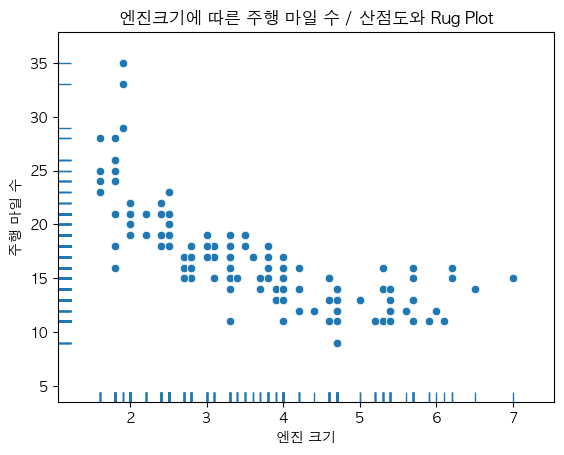

In [38]:
plt.subplots()
sns.scatterplot(data = df, x = 'displ', y = 'cty')
ax = sns.rugplot(data = df, x = 'displ', y = 'cty')
ax.set_title('엔진크기에 따른 주행 마일 수 / 산점도와 Rug Plot')
ax.set_xlabel('엔진 크기')
ax.set_ylabel('주행 마일 수')

### (2) 엔진 크기 히스토그램
- data: 그리고자 하는 데이터셋
- x: 히스토그램을 그릴 데이터 컬럼
- kde: True일 경우 커널 밀도 그래프 생성
- bins: x축에 보여지는 계급의 개수 지정

Text(0, 0.5, '')

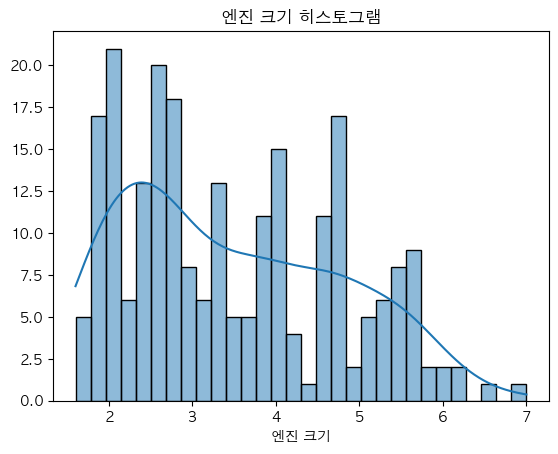

In [39]:
plt.subplots()
ax = sns.histplot(data = df, x = 'displ', bins = 30, kde = True)
ax.set_title('엔진 크기 히스토그램')
ax.set_xlabel('엔진 크기')
ax.set_ylabel('')
ax.set_xticks()

In [40]:
# 색상구분을 위한 구동 방식 유형 변경

drv_dict = {'f':'전륜 구동',
            '4':'사륜 구동',
            'r':'후륜 구동'}


def reset_dict(x):
    return drv_dict[x]

# df['drv'].map(drv_dict).value_counts()
# df['drv'].apply(lambda x: drv_dict[x])

df['drv'] = df['drv'].apply(reset_dict)

In [42]:
df['drv'].value_counts()

drv
전륜 구동    106
사륜 구동    103
후륜 구동     25
Name: count, dtype: int64

Text(0, 0.5, '')

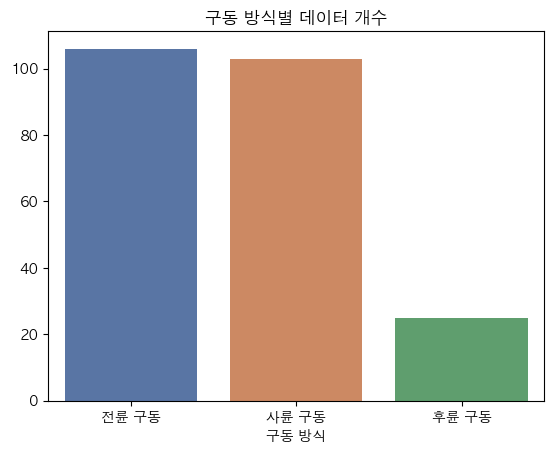

In [46]:
# countplot(컬럼 -> drv)
plt.figure()
ax = sns.countplot(data = df, x = 'drv', palette = 'deep')
ax.set_title('구동 방식별 데이터 개수')
ax.set_xlabel('구동 방식')
ax.set_ylabel('')

In [48]:
df['cyl'].value_counts()

cyl
4    81
6    79
8    70
5     4
Name: count, dtype: int64

Text(0, 0.5, '')

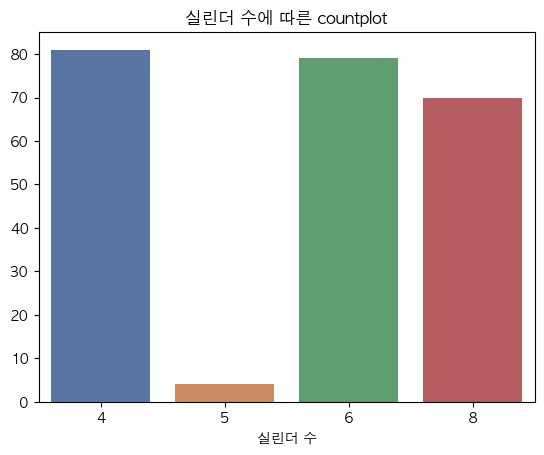

In [51]:
# countplot(컬럼 -> cyl)
plt.figure()
ax = sns.countplot(data = df, x = 'cyl', palette = 'deep')
ax.set_title('실린더 수에 따른 countplot')
ax.set_xlabel('실린더 수')
ax.set_ylabel('')

<Figure size 640x480 with 0 Axes>

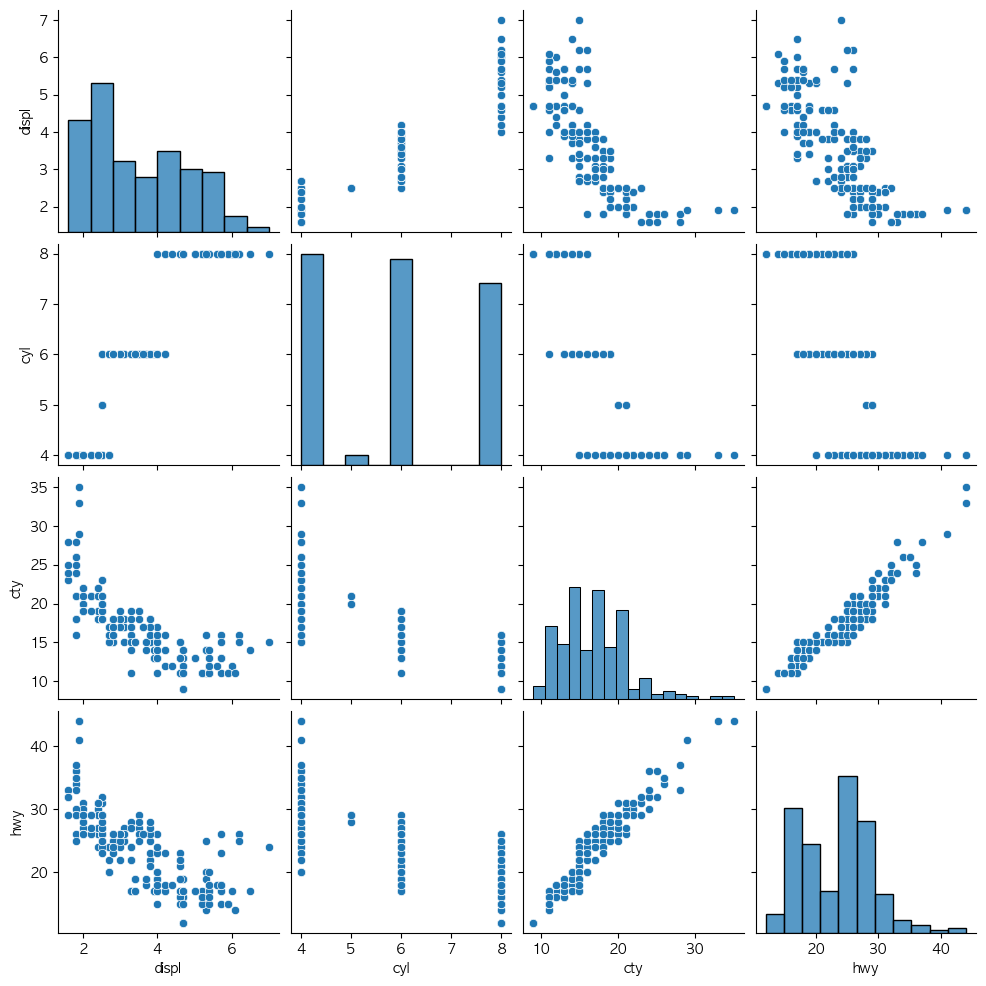

In [53]:
# pairplot
plt.figure()
new_df = df.loc[:, ['displ', 'cyl', 'cty', 'hwy']]
ax = sns.pairplot(data=new_df)